In [7]:
#importing libraries
import numpy as n
import matplotlib.pyplot as m
import pandas as p

#loading the dataset
dataset = p.read_csv(os.path.abspath('poker-hand-training-true.csv'), sep=',').values

#splitting the dataset into the source variables (independant variables) and the target variable (dependant variable)
sourcevars = dataset[:,:-1] #all columns except the last one
targetvar = dataset[:,len(dataset[0])-1] #only the last column


# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(sourcevars , targetvar)
# display the relative importance of each attribute
print(model.feature_importances_)

[0.06900605 0.13135704 0.06822384 0.13150496 0.07328889 0.12895805
 0.07813575 0.13376058 0.06282592 0.12293892]


Feature ranking:
1. feature 7 (0.133761)
2. feature 3 (0.131505)
3. feature 1 (0.131357)
4. feature 5 (0.128958)
5. feature 9 (0.122939)
6. feature 6 (0.078136)
7. feature 4 (0.073289)
8. feature 0 (0.069006)
9. feature 2 (0.068224)
10. feature 8 (0.062826)


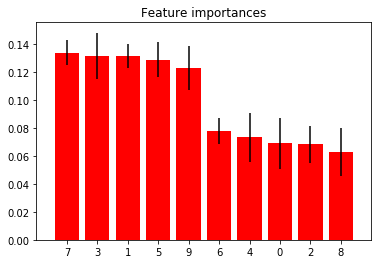

In [14]:
import matplotlib.pyplot as plt
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(sourcevars.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(sourcevars.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(sourcevars.shape[1]), indices)
plt.xlim([-1, sourcevars.shape[1]])
plt.show()